In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cognifyz-dataset/Dataset  (1).csv


In [23]:
df = pd.read_csv('/kaggle/input/cognifyz-dataset/Dataset  (1).csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Level 1
## Task 1

* Explore the dataset and identify the number of rows and columns.
* Check for missing values in each column and handle them accordingly.
* Perform data type conversion if necessary. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.

In [24]:
print('number of rows',df.shape[0])
print('number of columns',df.shape[1])

number of rows 9551
number of columns 21


In [25]:
print(' number of missing values column vise '.center(50,'~'))
df.isnull().sum()

~~~~~~ number of missing values column vise ~~~~~~


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

* conclusion :
`There's only 9 missing value in Cuisine's column`

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [27]:
df['Aggregate rating'] # its a regression column so,there is nothing like imbalance class lets visualize it

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

/tmp/ipykernel_34/95774152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Aggregate rating'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Aggregate rating', ylabel='Density'>

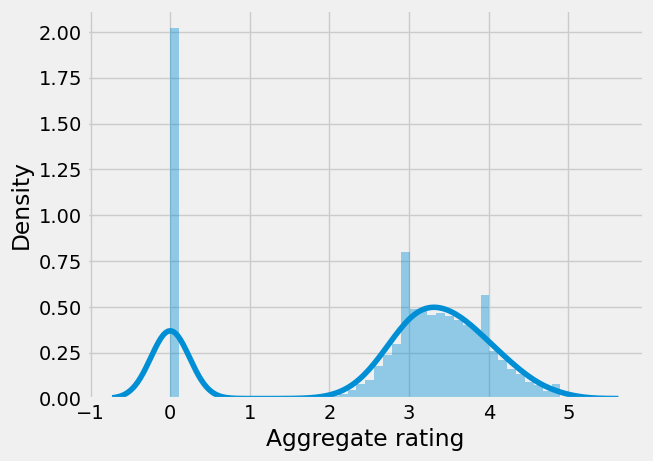

In [29]:
sns.distplot(df['Aggregate rating'])

* conclusion :
`by studing this graph we can say that mostly values lie between 3-5`

# Task 2:
* Calculate basic statistical measures (mean,median, standard deviation, etc.) for numerical columns.
* Explore the distribution of categorical variables like "Country Code," "City," and "Cuisines."
* Identify the top cuisines and cities with the highest number of restaurants.

In [30]:
num_col = df.select_dtypes(np.number).columns

In [31]:
df[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant ID,9551.0,9.051128e+06,8.791521e+06,53.000000,301962.500000,6.004089e+06,1.835229e+07,1.850065e+07
Country Code,9551.0,1.836562e+01,5.675055e+01,1.000000,1.000000,1.000000e+00,1.000000e+00,2.160000e+02
Longitude,9551.0,6.412657e+01,4.146706e+01,-157.948486,77.081343,7.719196e+01,7.728201e+01,1.748321e+02
Latitude,9551.0,2.585438e+01,1.100794e+01,-41.330428,28.478713,2.857047e+01,2.864276e+01,5.597698e+01
Average Cost for two,9551.0,1.199211e+03,1.612118e+04,0.000000,250.000000,4.000000e+02,7.000000e+02,8.000000e+05
Price range,9551.0,1.804837e+00,9.056088e-01,1.000000,1.000000,2.000000e+00,2.000000e+00,4.000000e+00
Aggregate rating,9551.0,2.666370e+00,1.516378e+00,0.000000,2.500000,3.200000e+00,3.700000e+00,4.900000e+00
Votes,9551.0,1.569097e+02,4.301691e+02,0.000000,5.000000,3.100000e+01,1.310000e+02,1.093400e+04


In [32]:
df.select_dtypes(object).columns

Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

In [33]:
cat_cols = ['Restaurant Name', 'City',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text']

<Axes: xlabel='City'>

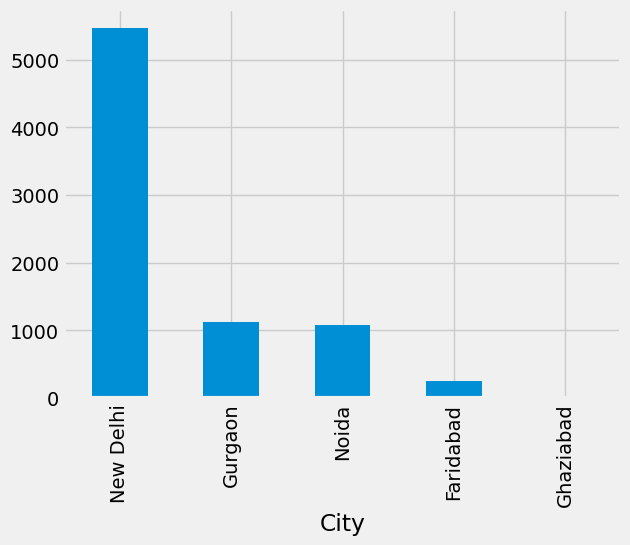

In [34]:
# there so many values so we are using top 5 city to visualize data
df['City'].value_counts().head().plot(kind = 'bar')

<Axes: xlabel='Cuisines'>

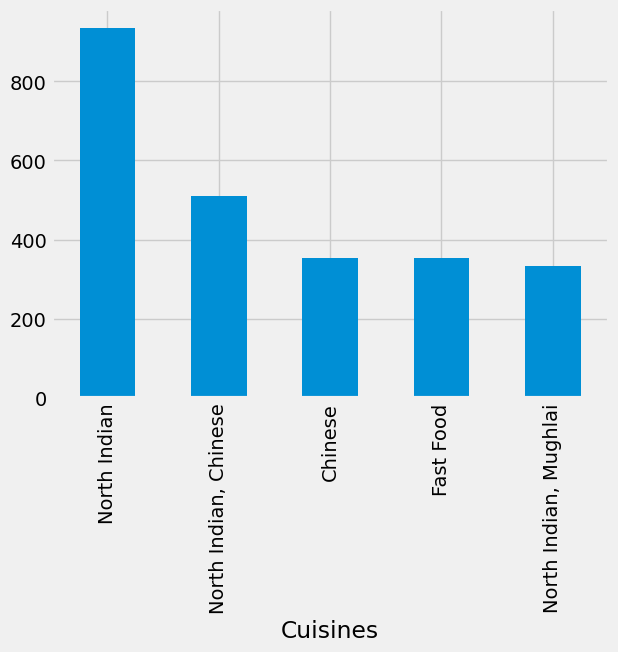

In [35]:
# # there so many values so we are using top 5 cuisines to visualize data
df["Cuisines"].value_counts().head().plot(kind = 'bar')

<Axes: xlabel='Country Code'>

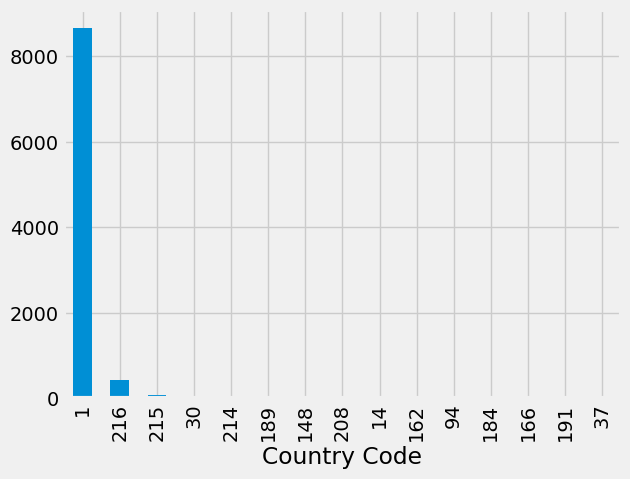

In [36]:
df['Country Code'].value_counts().plot(kind = 'bar')

In [37]:
temp = df.groupby(['City','Cuisines'])['Restaurant ID'].count().reset_index()

In [38]:
temp.groupby('City')[['Cuisines','Restaurant ID']].max()

,Cuisines,Restaurant ID
City,,
Abu Dhabi,"Turkish, Arabian, Middle Eastern",2
Agra,"South Indian, Desserts",5
Ahmedabad,"Pizza, Italian, Beverages, Desserts",1
Albany,"Steak, Tapas, Bar Food",2
Allahabad,"South Indian, North Indian, Chinese, Continental",3
...,...,...
Weirton,"Burger, Greek, Sandwich",1
Wellington City,"Vietnamese, Fish and Chips",3
Winchester Bay,"Burger, Seafood, Steak",1


# Task 3 :
* Visualize the locations of restaurants on a map using latitude and longitude information.
* Analyze the distribution of restaurants across different cities or countries. Determine if there is any correlation between the restaurant's location and its rating.

In [39]:
import plotly.express as px
import plotly.figure_factory as ff

In [52]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude",
                  color_continuous_scale=px.colors.cyclical.IceFire, zoom=10,
                  mapbox_style="open-street-map",width=1200,height=700)

fig

In [53]:
# Analyze the distribution of restaurants
# across different cities or countries.
# Determine if there is any correlation
# between the restaurant's location and its
# rating.

<Axes: >

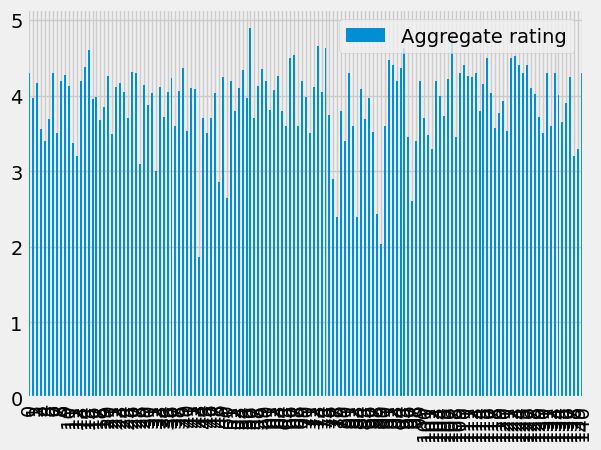

In [63]:
df.groupby('City')['Aggregate rating'].mean().reset_index().plot(kind = 'bar')

* conclusion :
`offcourse there is a connection between country citites rating we need some different methods tips and tricks to jusitfy this but in real world country and city impact rating for food`

# Level 2
## Task 1
* Determine the percentage of restaurants that offer table booking and online delivery.
* Compare the average ratings of restaurants with table booking and those without.
* Analyze the availability of online delivery among restaurants with different price ranges.

In [77]:
print('percentage of restaurants that offer table booking and online delivery',np.round((df[(df['Has Table booking'] == 'Yes') & (df['Has Online delivery'] == 'Yes')]['Restaurant ID'].count())/ (df.shape[0]),2))

percentage of restaurants that offer table booking and online delivery 0.05


In [88]:
has_table = df.groupby('Has Table booking')['Aggregate rating'].mean().reset_index()
has_table['Aggregate rating']  = np.round(df['Aggregate rating'],2)

In [89]:
has_table

,Has Table booking,Aggregate rating
0,No,4.8
1,Yes,4.5


In [98]:
pd.crosstab(df['Price range'],df['Has Online delivery'],normalize = True,margins = True)

Has Online delivery,No,Yes,All
Price range,,,
1,0.391896,0.073395,0.465292
2,0.191289,0.134646,0.325934
3,0.104387,0.043032,0.147419
4,0.055806,0.005549,0.061355
All,0.743378,0.256622,1.000000


# Task 2

* Determine the most common price range among all the restaurants.
* Calculate the average rating for each price range.
* Identify the color that represents the highest average rating among different price ranges.

<Axes: xlabel='Price range'>

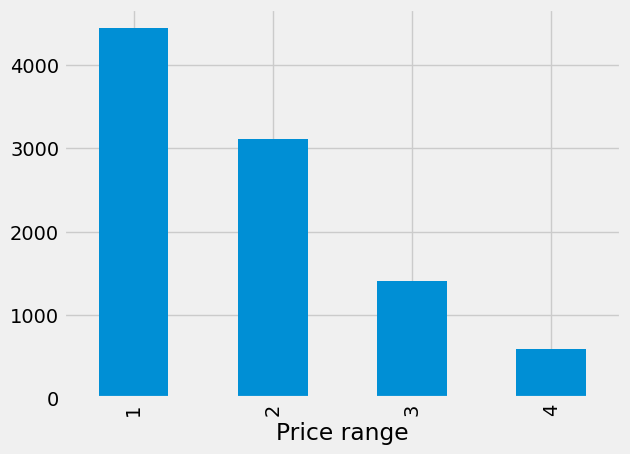

In [102]:
df['Price range'].value_counts().plot(kind = 'bar')

* conclusion :
`1 is the most common price range`

In [ ]:
# Calculate the average rating for each price
# range.

In [112]:
(df.groupby('Price range')['Aggregate rating'].sum()/len(df)).reset_index()

,Price range,Aggregate rating
0,1,0.930531
1,2,0.958591
2,3,0.543001
3,4,0.234248


In [113]:
# Identify the color that represents the highest
# average rating among different price ranges.

In [116]:
df[['Price range','Rating color','Aggregate rating']]

,Price range,Rating color,Aggregate rating
0,3,Dark Green,4.8
1,3,Dark Green,4.5
2,4,Green,4.4
3,4,Dark Green,4.9
4,4,Dark Green,4.8
...,...,...,...
9546,3,Green,4.1
9547,3,Green,4.2
9548,4,Yellow,3.7
9549,4,Green,4.0


In [121]:
df.pivot_table(index = 'Price range',columns = 'Rating color',values = 'Aggregate rating',aggfunc = 'max')

Rating color,Dark Green,Green,Orange,Red,White,Yellow
Price range,,,,,,
1,4.9,4.4,3.4,2.4,0.0,3.9
2,4.9,4.4,3.4,2.4,0.0,3.9
3,4.9,4.4,3.4,2.4,0.0,3.9
4,4.9,4.4,3.4,2.4,0.0,3.9


# Task 3:
* Extract additional features from the existing columns, such as the length of the restaurant name or address.
* Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [131]:
df['Length of restaurant name'] = df['Restaurant Name'].apply(lambda x: len(x))

In [135]:
df['length of address'] = df['Address'].apply(lambda x : len(x))

In [140]:
df[['Has Table booking','Has Online delivery','Is delivering now','Switch to order menu','Rating color','Rating text']].sample()

,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Rating color,Rating text
7211,No,No,No,No,White,Not rated


In [152]:
df['Has Table booking'] = df['Has Table booking'].replace('Yes',1).replace('No',0)

/tmp/ipykernel_34/113234813.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [156]:
df['Has Online delivery'] = df['Has Online delivery'].replace('Yes',1).replace('No',0)

/tmp/ipykernel_34/786613312.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [160]:
df['Is delivering now'] =df['Is delivering now'].replace('Yes',1).replace('No',0)

/tmp/ipykernel_34/2954563912.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [167]:
df.drop('Switch to order menu',axis =1,inplace = True)

In [178]:
df['Rating text'] = df['Rating text'].replace('Not rated',0).replace('Poor',1).replace('Average',2).replace('Good',3).replace('Very Good',4).replace('Excellent',5)

/tmp/ipykernel_34/2946472129.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [181]:
df['Rating color'].value_counts()

Rating color
Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: count, dtype: int64

In [185]:
df['Rating color'] = df['Rating color'].replace('Red',0).replace('Orange',1).replace('Yellow',2).replace('White',3).replace('Green',4).replace('Dark Green',5)

/tmp/ipykernel_34/2449289854.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



# Level 3
## Task 3
* Build a regression model to predict the aggregate rating of a restaurant based on available features.
* Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.
* Experiment with different algorithms (e.g.,linear regression, decision trees, randomforest) and compare their performance.

In [187]:
backup_df = df.copy()

In [191]:
df.drop('Restaurant ID',axis = 1,inplace= True)

In [193]:
df.drop('Restaurant Name',axis = 1,inplace = True)

In [196]:
df.drop('Address',axis = 1,inplace = True)

In [209]:
df.drop(['Locality','Locality Verbose'],axis = 1,inplace = True)

In [238]:
df = pd.get_dummies(df,dtype = int)

In [231]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [241]:
x = df.drop(columns = 'Aggregate rating')
y = df['Aggregate rating']

In [245]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state = 42,shuffle  =True)

In [247]:
lr = LinearRegression()

In [252]:
ypred = lr.fit(xtrain,ytrain).predict(xtest)

In [249]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [255]:
print('r2 score ',r2_score(ytest,ypred))
print('mean squared error ',mean_squared_error(ytest,ypred))
print('mean absolute percentage error',mean_absolute_error(ytest,ypred))

r2 score  0.9818026936915712
mean squared error  0.041419052488030114
mean absolute percentage error 0.1523812748697357


* conclusion :
`Our Liner Regression model performing exceptionally well`

In [258]:
evaluation = pd.DataFrame(columns = ['model','R2','mean squared error','mean absolute percentage error'])

In [265]:
evaluation = evaluation._append({'model':'linear regression model','R2':r2_score(ytest,ypred),'mean squared error':mean_squared_error(ytest,ypred),'mean absolute percentage error':mean_absolute_error(ytest,ypred)},ignore_index = True)

/tmp/ipykernel_34/3757690215.py:1: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [266]:
evaluation

,model,R2,mean squared error,mean absolute percentage error
0,linear regression model,0.981803,0.041419,0.152381


In [267]:
from sklearn.tree import DecisionTreeRegressor

In [268]:
dr = DecisionTreeRegressor()

In [270]:
ypred = dr.fit(xtrain,ytrain).predict(xtest)

In [271]:
print('r2 score ',r2_score(ytest,ypred))
print('mean squared error ',mean_squared_error(ytest,ypred))
print('mean absolute percentage error',mean_absolute_error(ytest,ypred))

r2 score  0.9751198045123768
mean squared error  0.056630036630036615
mean absolute percentage error 0.1492412349555207


In [272]:
evaluation = evaluation._append({'model':'Decision Tree Model','R2':r2_score(ytest,ypred),'mean squared error':mean_squared_error(ytest,ypred),'mean absolute percentage error':mean_absolute_error(ytest,ypred)},ignore_index = True)

In [273]:
evaluation

,model,R2,mean squared error,mean absolute percentage error
0,linear regression model,0.981803,0.041419,0.152381
1,Decision Tree Model,0.975120,0.056630,0.149241


In [274]:
from sklearn.ensemble import RandomForestRegressor

In [275]:
rf = RandomForestRegressor()

In [276]:
ypred = rf.fit(xtrain,ytrain).predict(xtest)

In [277]:
evaluation = evaluation._append({'model':'Random Forest model','R2':r2_score(ytest,ypred),'mean squared error':mean_squared_error(ytest,ypred),'mean absolute percentage error':mean_absolute_error(ytest,ypred)},ignore_index = True)

In [279]:
evaluation

,model,R2,mean squared error,mean absolute percentage error
0,linear regression model,0.981803,0.041419,0.152381
1,Decision Tree Model,0.975120,0.056630,0.149241
2,Random Forest model,0.986924,0.029762,0.116605


* Conclusion :
`Its clearly visible linear regression isperforming well without making any changes`

# Task 3
* Analyze the relationship between the type of cuisine and the restaurant's rating.
* Identify the most popular cuisines among customers based on the number of votes.
* Determine if there are any specific cuisines that tend to receive higher ratings.

<Axes: xlabel='Cuisines'>

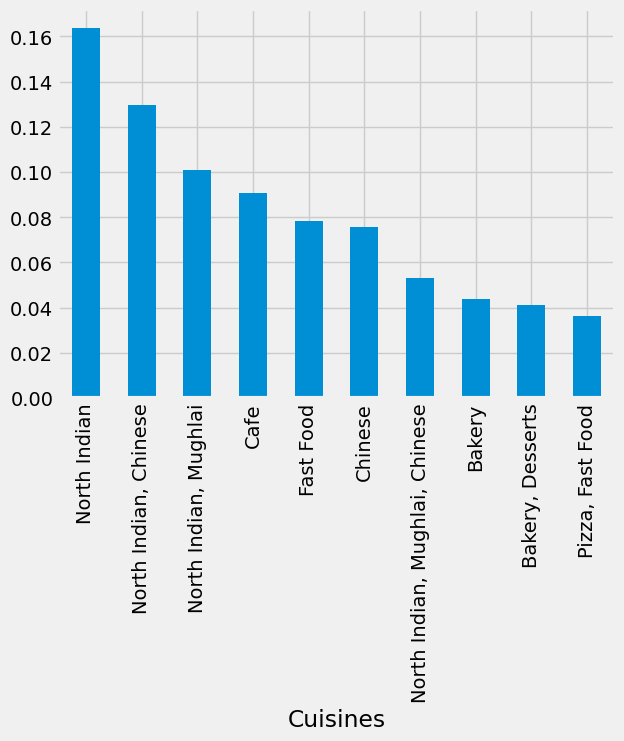

In [291]:
# Analyze the relationship between the type of cuisine and the restaurant's rating.
temp = (backup_df.groupby('Cuisines')['Aggregate rating'].sum())/len(df)
temp.sort_values(ascending = False).head(10).plot(kind = 'bar')
# so many cuisines so we are taking only top 10

In [ ]:
Identify the most popular cuisines among
customers based on the number of votes.

<Axes: xlabel='Cuisines'>

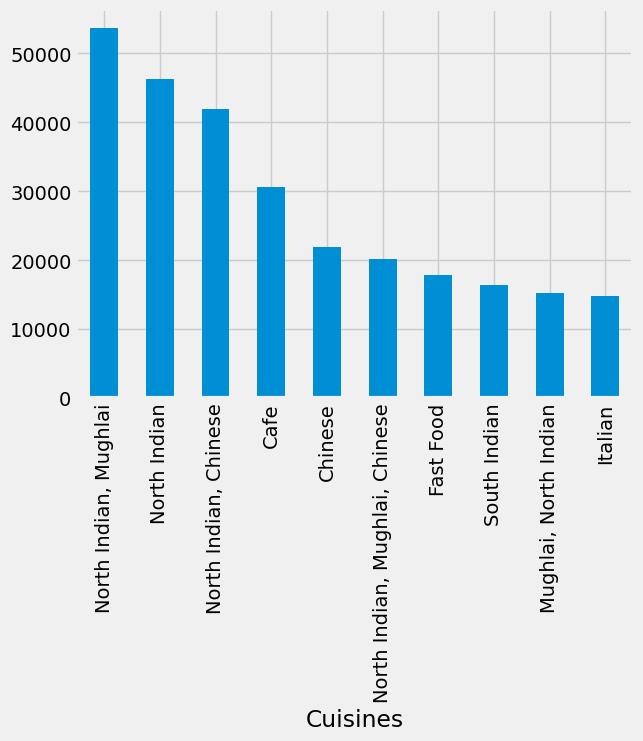

In [302]:
backup_df.groupby('Cuisines')['Votes'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar')

<Axes: xlabel='Cuisines'>

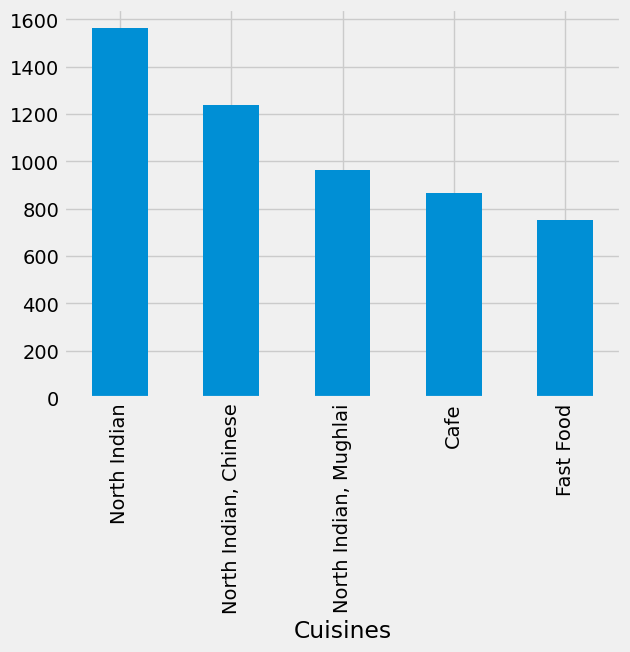

In [307]:
backup_df.groupby('Cuisines')['Aggregate rating'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar')

* conclusion : `so north indian is the most famous cuisines all`

# Task 3:
* Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).
* Compare the average ratings of different cuisines or cities using appropriate visualizations.
* Visualize the relationship between various features and the target variable to gain insights.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



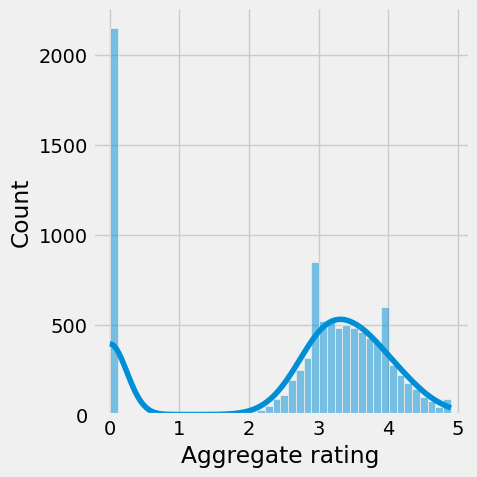

In [311]:
sns.displot(backup_df['Aggregate rating'],kde = True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



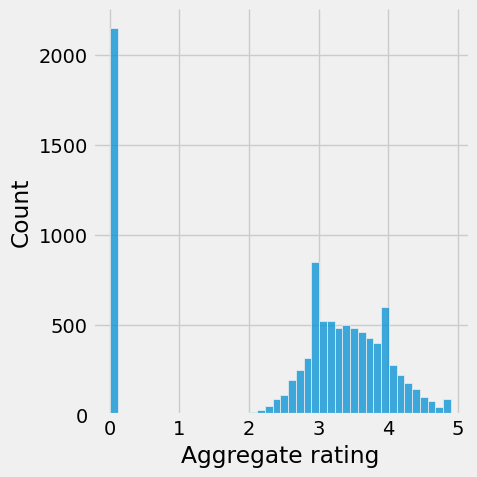

In [312]:
sns.displot(backup_df['Aggregate rating'])

<Axes: >

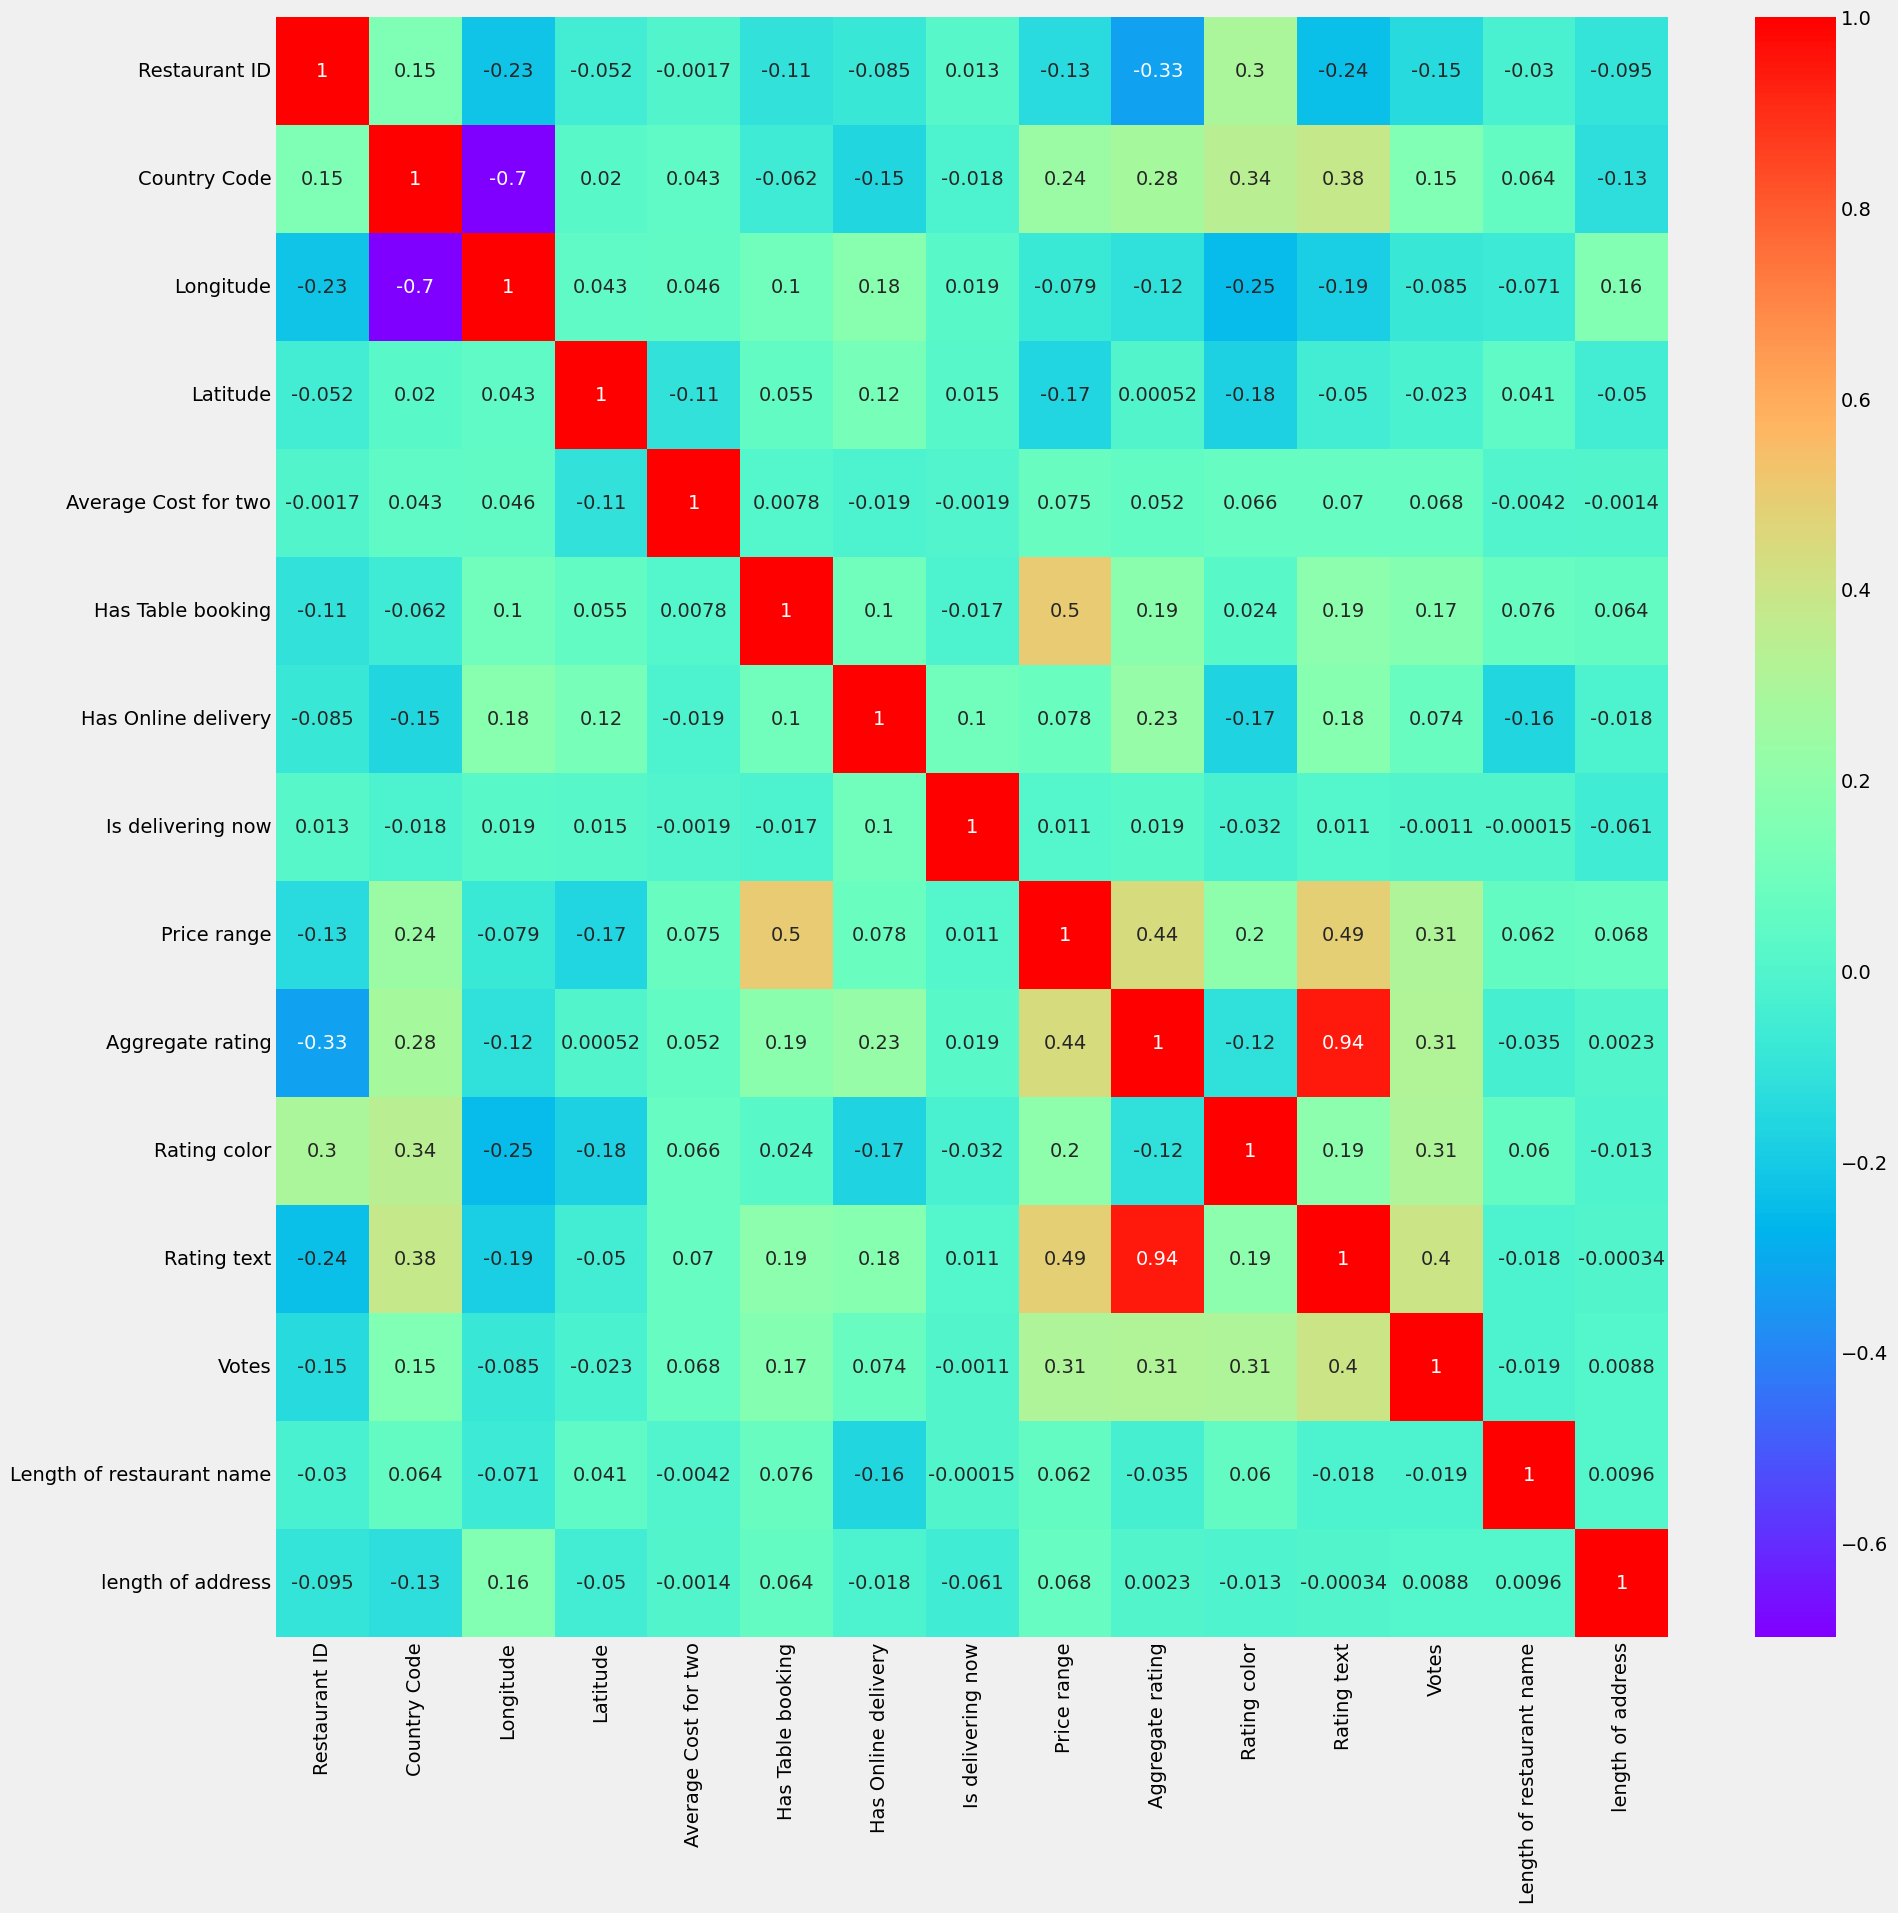

In [320]:
plt.figure(figsize = (20,20))
sns.heatmap(backup_df.select_dtypes(np.number).corr(),annot = True,cmap = 'rainbow')